In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import json
#from scipy.interpolate import interp1d, UnivariateSpline

In [42]:
!scp pi@192.168.1.29:/home/pi/covid/daily_data.csv .

daily_data.csv                                100%  993   164.8KB/s   00:00    


In [43]:
daily = pd.read_csv('daily_data.csv')

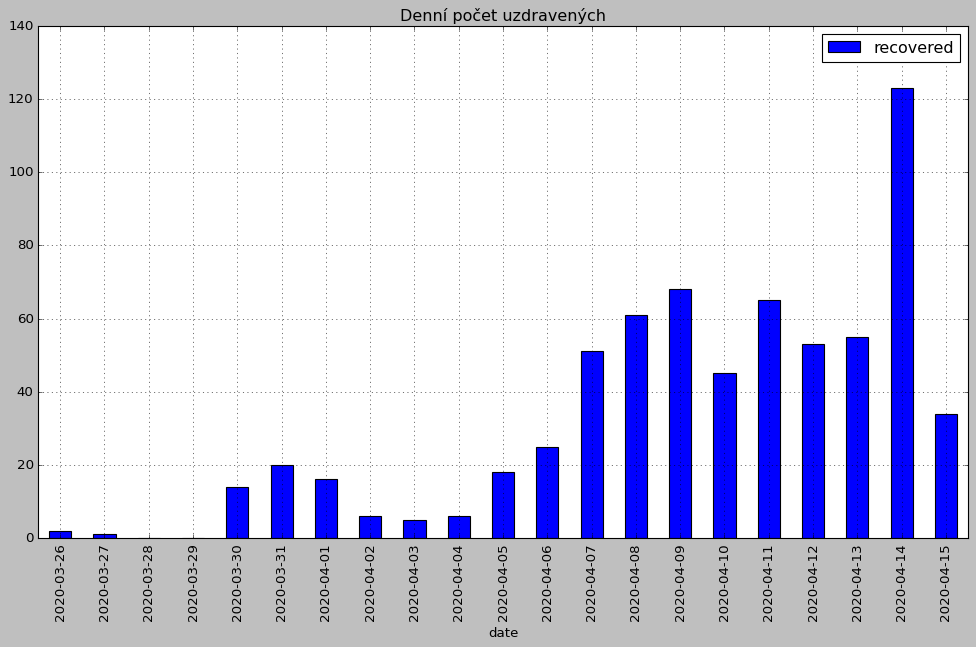

In [44]:
plt.style.use('classic')
daily.plot(x='date', 
            y='recovered', 
            kind='bar', 
            #style='r+-',
            figsize=(15, 8),
            grid=True, 
            title='Denní počet uzdravených')
plt.xticks(rotation=90)
plt.show()

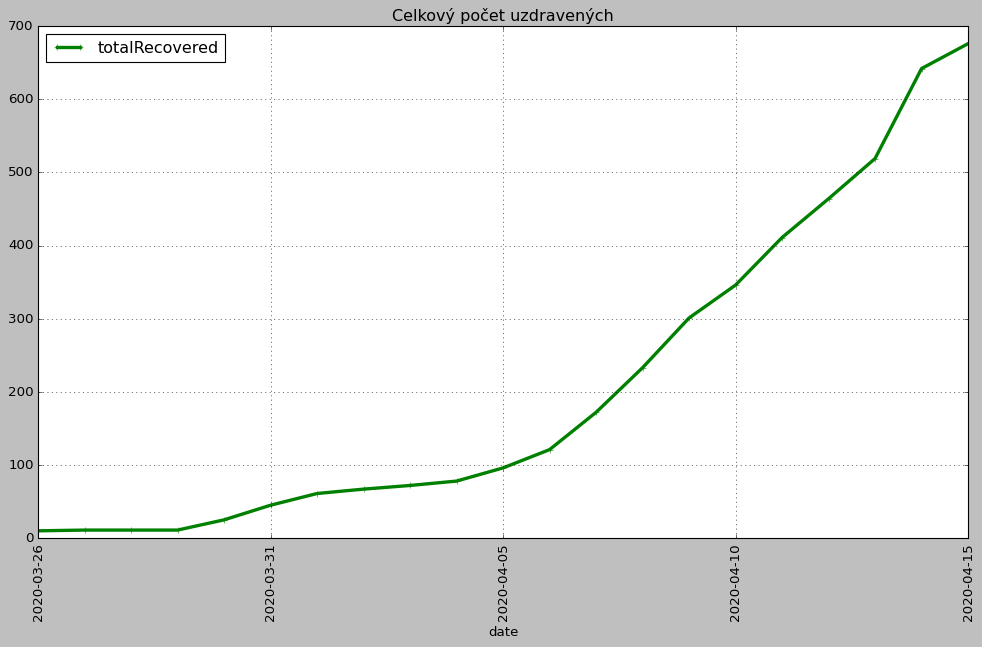

In [45]:
plt.style.use('classic')
daily.plot(x='date', 
            y='totalRecovered', 
            kind='line',
            linewidth=3,
            style='g+-',
            figsize=(15, 8),
            grid=True, 
            title='Celkový počet uzdravených')
plt.xticks(rotation=90)
plt.show()

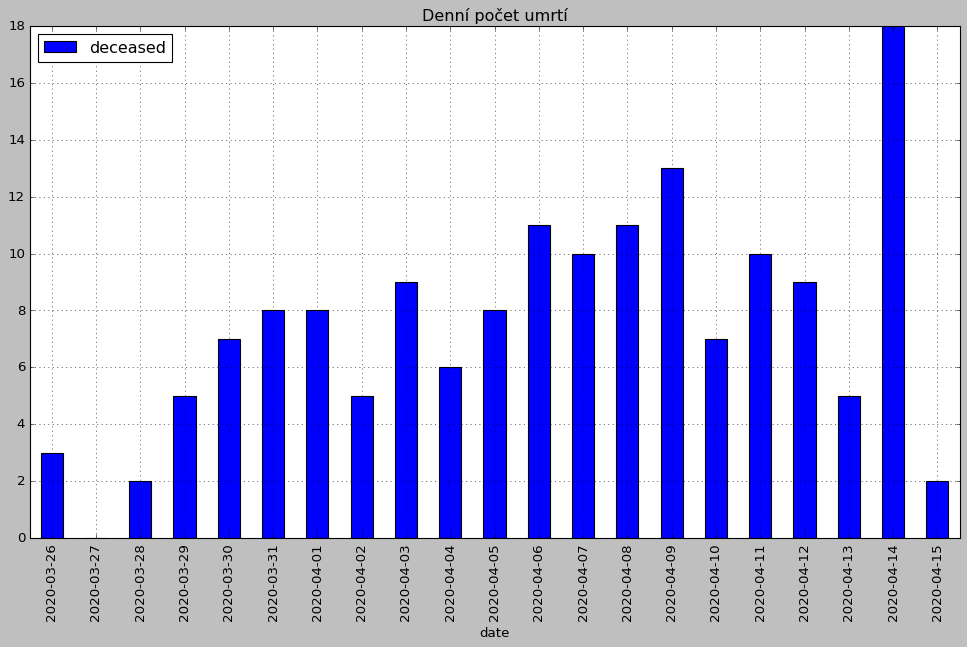

In [46]:
plt.style.use('classic')
daily.plot(x='date', 
            y='deceased', 
            kind='bar', 
            #style='r+-',
            figsize=(15, 8),
            grid=True, 
            title='Denní počet umrtí')
plt.xticks(rotation=90)
plt.show()

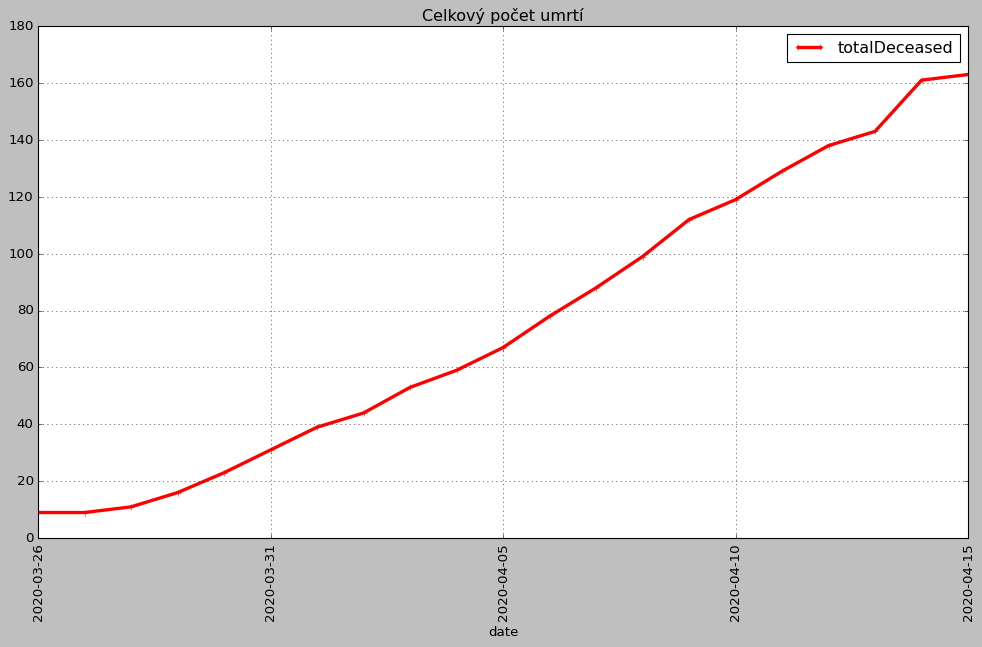

In [47]:
plt.style.use('classic')
daily.plot(x='date', 
            y='totalDeceased', 
            kind='line',
            linewidth=3,
            style='r+-',
            figsize=(15, 8),
            grid=True, 
            title='Celkový počet umrtí')
plt.xticks(rotation=90)
plt.show()

In [48]:
daily

,date,totalTested,tested,totalInfected,infected,totalRecovered,recovered,totalDeceased,deceased
0,2020-03-26,31127,4429,2022,259,10,2,9,3
1,2020-03-27,36374,5247,2395,373,11,1,9,0
2,2020-03-28,40700,4326,2657,262,11,0,11,2
3,2020-03-29,40700,0,2805,148,11,0,16,5
4,2020-03-30,43498,2798,2976,171,25,14,23,7
5,2020-03-31,48811,5313,3257,281,45,20,31,8
6,2020-04-01,55017,6206,3508,251,61,16,39,8
7,2020-04-02,60990,5973,3805,297,67,6,44,5
8,2020-04-03,67281,6291,4091,286,72,5,53,9
9,2020-04-04,74170,6889,4362,271,78,6,59,6


In [49]:
daily['active'] = daily['totalInfected'] - daily['totalRecovered'] - daily['totalDeceased'] 

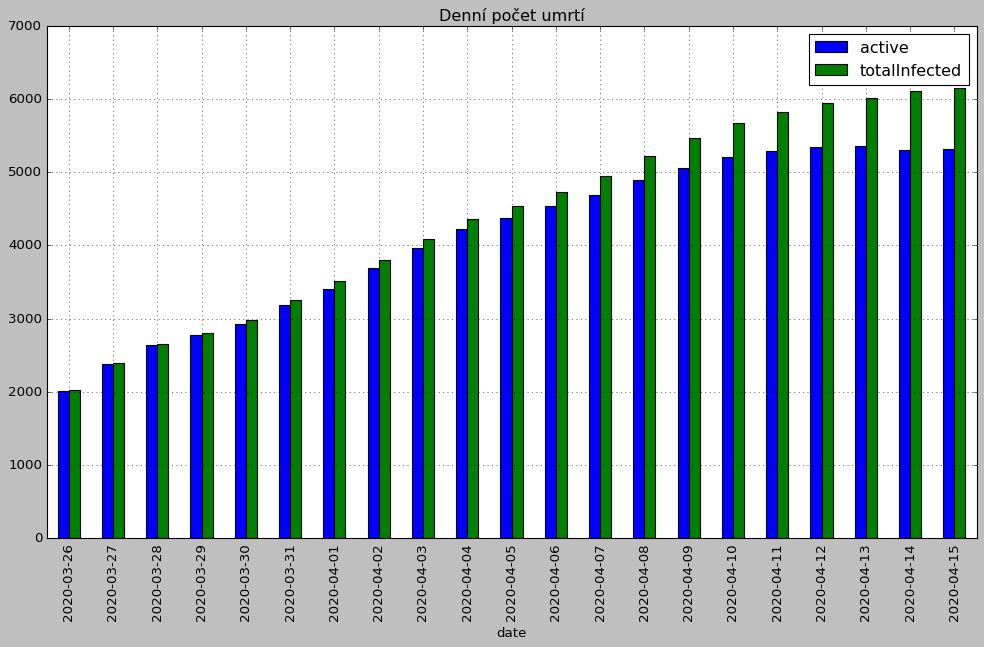

In [50]:
plt.style.use('classic')
daily.plot(x='date', 
            y=['active', 'totalInfected'], 
            kind='bar', 
            #style='r+-',
            figsize=(15, 8),
            grid=True, 
            title='Denní počet umrtí')
plt.xticks(rotation=90)
plt.show()

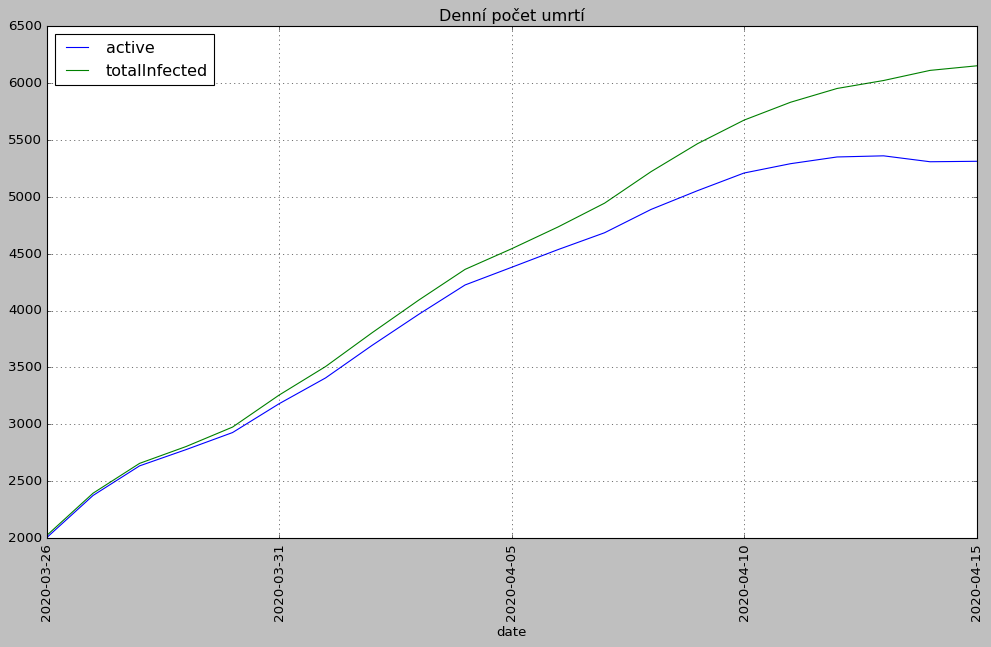

In [51]:
plt.style.use('classic')
daily.plot(x='date', 
            y=['active', 'totalInfected'], 
            kind='line', 
            #style='r+-',
            figsize=(15, 8),
            grid=True, 
            title='Denní počet umrtí')
plt.xticks(rotation=90)
plt.show()

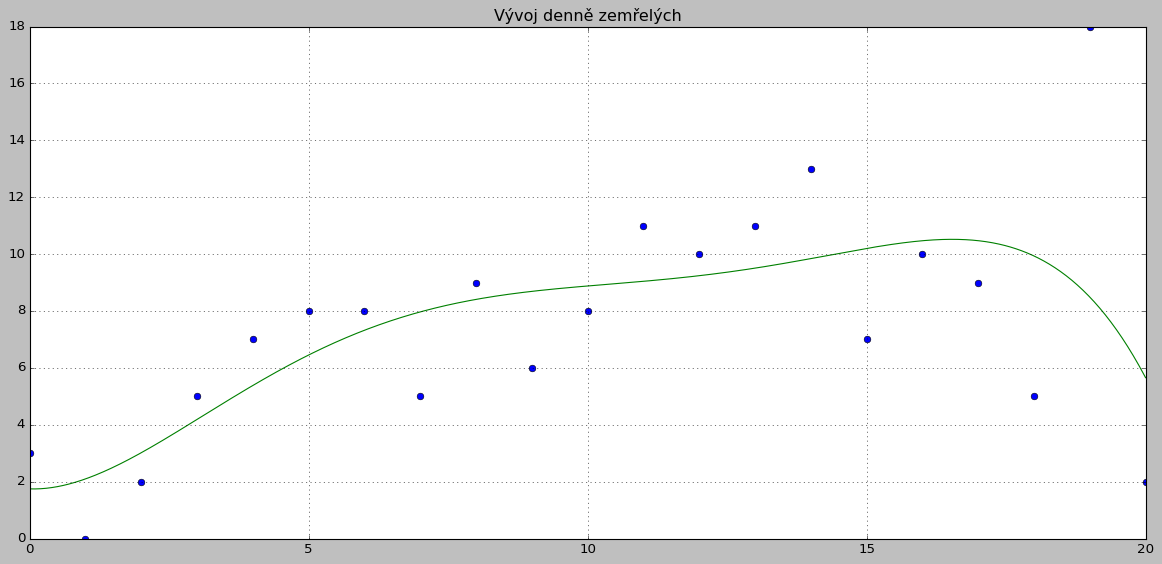

In [52]:
# interpoolace polynomem 5. řádu
x = list(daily.index)
y = daily['deceased']
z = np.polyfit(x,y,5)
p = np.poly1d(z)
xnew = np.linspace(x[0], x[-1], 1000)
plt.figure(figsize=(18,8))
plt.plot(x, y, 'o',
         xnew, p(xnew), '-')
plt.grid(True)
plt.title('Vývoj denně zemřelých')
plt.show()

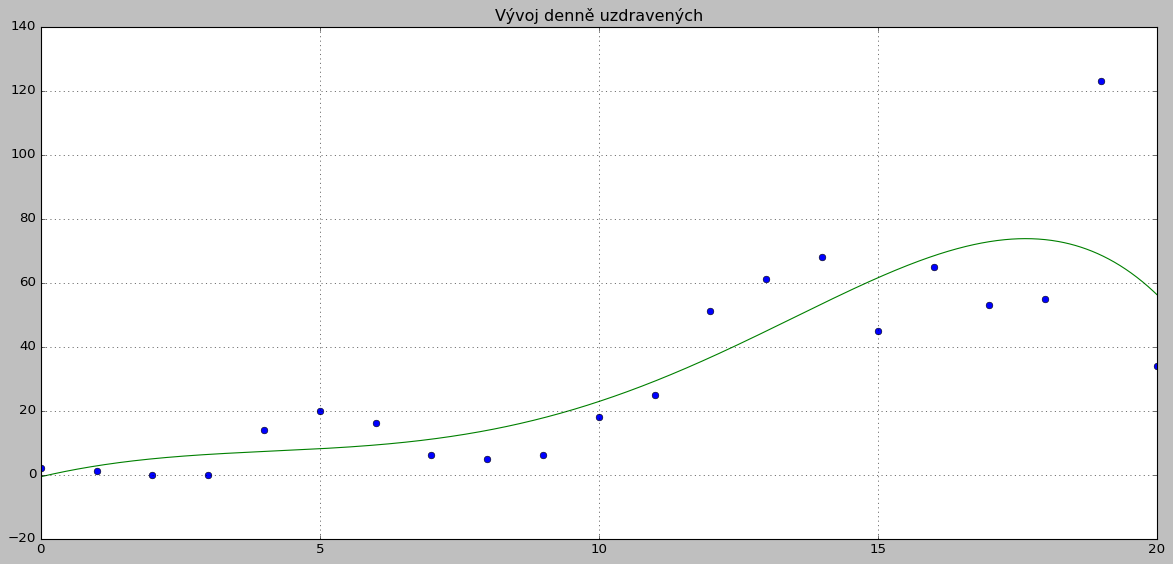

In [56]:
# interpoolace polynomem 5. řádu (nejmenší čtverce)
x = list(daily.index)
y = daily['recovered']
z = np.polyfit(x,y,5)
p = np.poly1d(z)
xnew = np.linspace(x[0], x[-1], 1000)
plt.figure(figsize=(18,8))
plt.plot(x, y, 'o',
         xnew, p(xnew), '-')
plt.grid(True)
plt.title('Vývoj denně uzdravených')
plt.show()

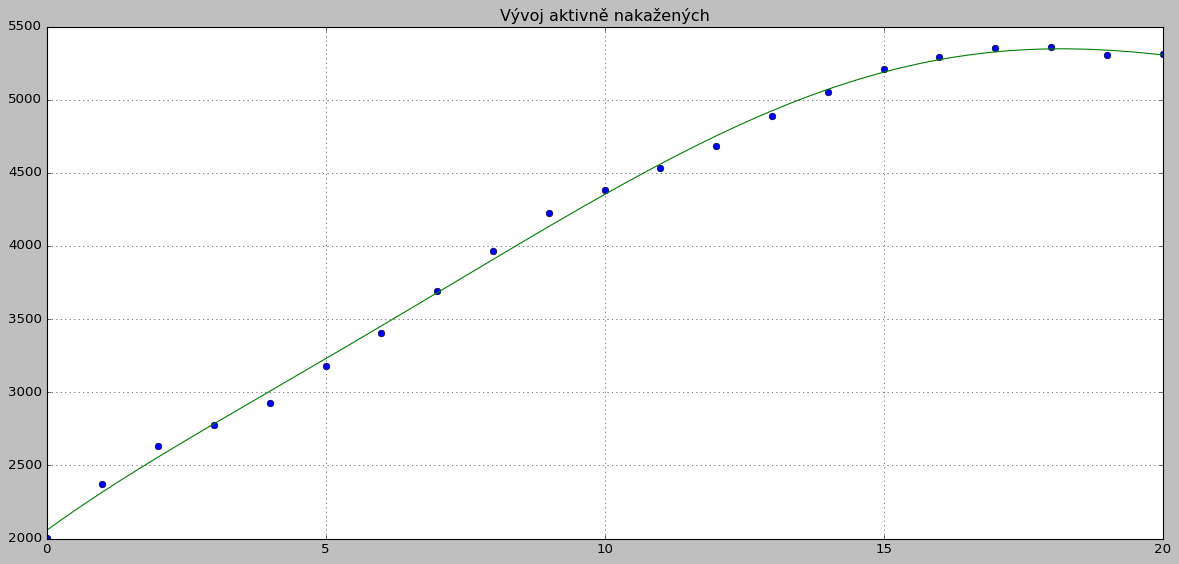

In [54]:
# interpoolace polynomem 5. řádu (nejmenší čtverce)
x = list(daily.index)
y = daily['active']
z = np.polyfit(x,y,5)
p = np.poly1d(z)
xnew = np.linspace(x[0], x[-1], 1000)
plt.figure(figsize=(18,8))
plt.plot(x, y, 'o',
         xnew, p(xnew), '-')
plt.grid(True)
plt.title('Vývoj aktivně nakažených')
plt.show()